In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Visualizations

### Dataset

In [3]:
df = pd.read_csv('data/in_context_responses.csv', lineterminator='\n').drop(columns=['Unnamed: 0'])
df.head(10)

user_id candidate hashtag  score_topic_0  score_topic_1  \
0  1.864362e+09     trump   biden            1.0            3.0   
1  1.132466e+18     biden   biden            5.0            4.0   
2  2.739945e+09     biden   biden            5.0            4.0   
3  5.937695e+08     biden   biden            5.0            5.0   
4  1.174653e+18     biden   biden            5.0            5.0   
5  2.388516e+09     biden   biden            2.0            4.0   
6  1.006104e+18     biden   biden            5.0            4.0   
7  1.624188e+07     biden   biden            5.0            5.0   
8  1.138512e+09     biden   biden            3.0            5.0   
9  6.118990e+07     biden   biden            5.0            5.0   

   score_topic_2  score_topic_3  score_topic_4  score_topic_5  score_topic_6  \
0            2.0            1.0            3.0            2.0            5.0   
1            5.0            5.0            5.0            4.0            3.0   
2            5.0            4.0            5.0            4.0            3.0   
3            5.0            5.0            5.0            5.0            1.0   
4            5.0            5.0            5.0            5.0            1.0   
5            5.0            5.0            5.0            4.0            1.0   
6            5.0            5.0            5.0            5.0            3.0   
7            5.0            5.0            5.0            5.0            1.0   
8            5.0            5.0            5.0            4.0            1.0   
9            5.0            5.0            5.0            5.0            1.0   

   score_topic_7  score_topic_8  score_topic_9  
0            5.0            1.0            4.0  
1            5.0            5.0            5.0  
2            5.0            5.0            4.0  
3            5.0            5.0            5.0  
4            5.0            5.0            5.0  
5            5.0            5.0            5.0  
6            5.0            5.0            5.0  
7            5.0            5.0            5.0  
8            5.0            5.0            5.0  
9            5.0            5.0            5.0

In [4]:
df = df.dropna(how='any')
df.shape

(95, 13)

### Questions

Please share your level of agreement with \_\_\_topic___. (score 1-5)

In [5]:
topics = ["improving LGBTQIA+ rights",
    "increasing gun control",
    "abortion being legalized",
    "the universities practicing affirmative action",
    "climate change in the US is cause for concern",
    "United States needs more paths for citizenship for undocumented immigrants",
    "death penalty",
    "allowing women to serve in military combat roles",
    "legalization of marijuana",
    "reducing interest rates for student loans"]

topics = pd.Series(topics)
topics

0                            improving LGBTQIA+ rights
1                               increasing gun control
2                             abortion being legalized
3       the universities practicing affirmative action
4        climate change in the US is cause for concern
5    United States needs more paths for citizenship...
6                                        death penalty
7     allowing women to serve in military combat roles
8                            legalization of marijuana
9            reducing interest rates for student loans
dtype: object

## Overview

Counting the supporters of Biden and Trump

<AxesSubplot:xlabel='candidate', ylabel='count'>

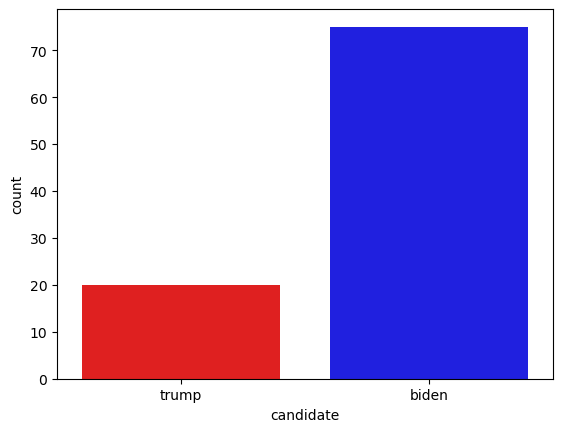

In [6]:
sns.countplot(data=df, x='candidate', palette=['red','blue'])

## Allowing transgender athletes (example)?

In [8]:
def visualize(df, question_No, topics):
    col = 'score_topic_' + str(question_No)
    fig, ax = plt.subplots(1, 2, sharex=False, sharey=True)
    fig.suptitle('Distribution of agreement on ' + topics[question_No])
    sns.histplot(ax=ax[0], data=df[df['candidate']=='trump'], x=col, stat='percent',
                 hue='candidate', palette=['red'], discrete=True, binrange=[1,5])
    sns.histplot(ax=ax[1], data=df[df['candidate']=='biden'], x=col, stat='percent',
                 hue='candidate', palette=['blue'], discrete=True, binrange=[1,5])

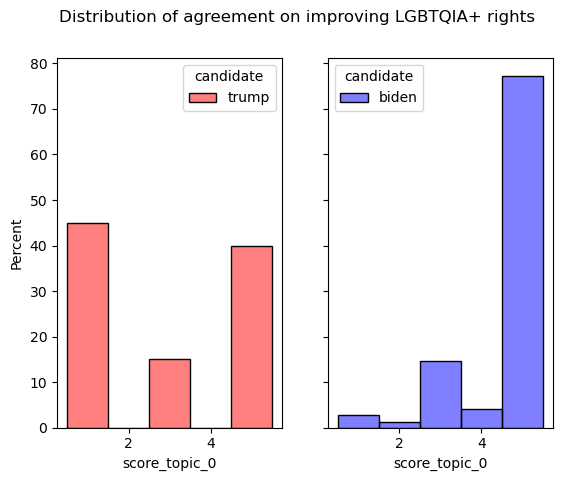

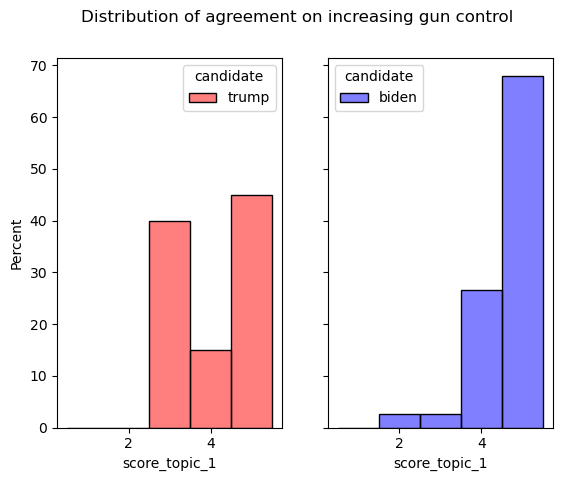

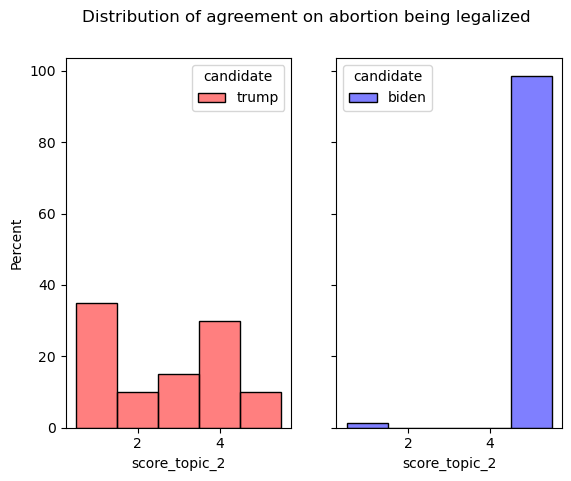

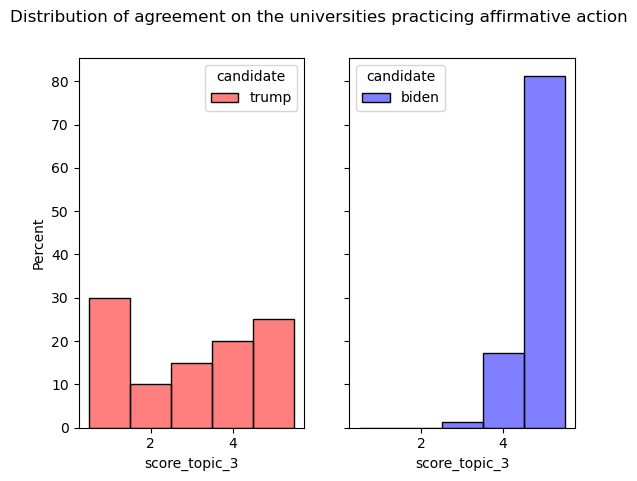

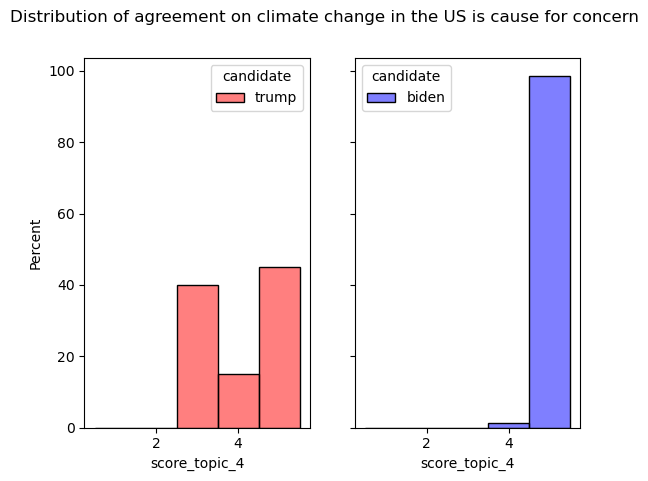

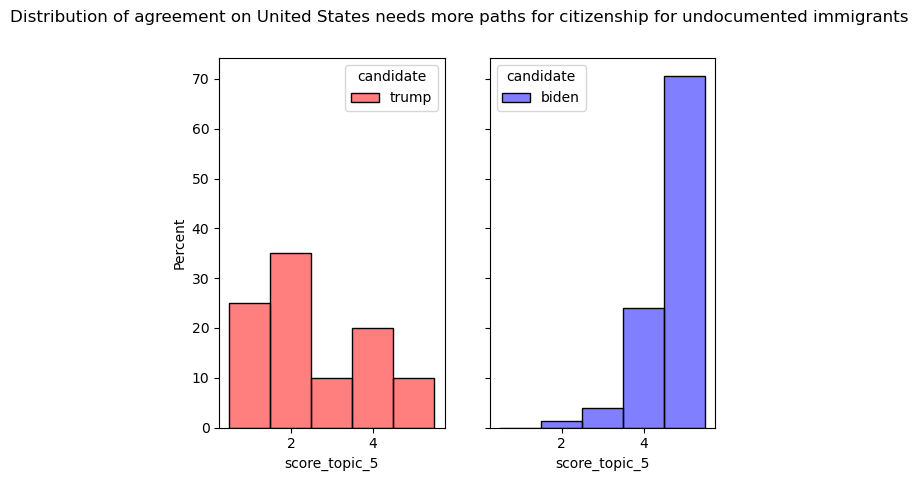

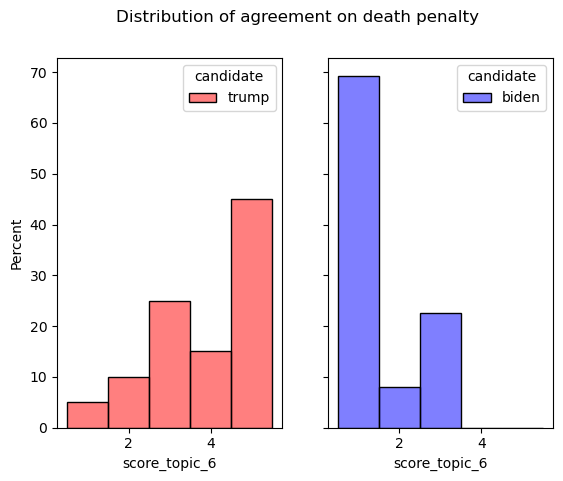

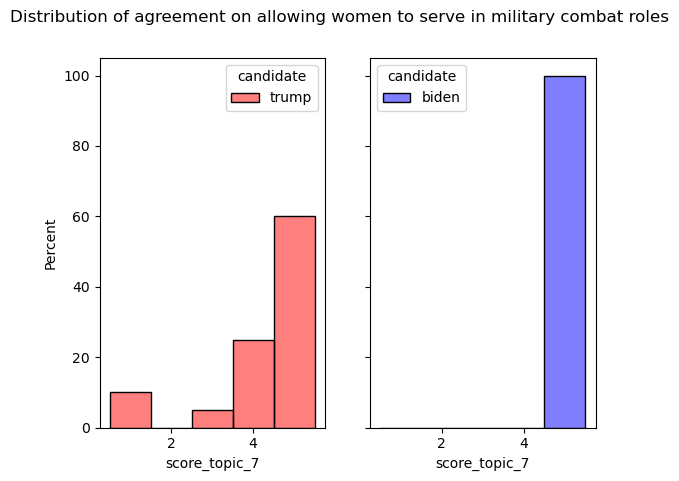

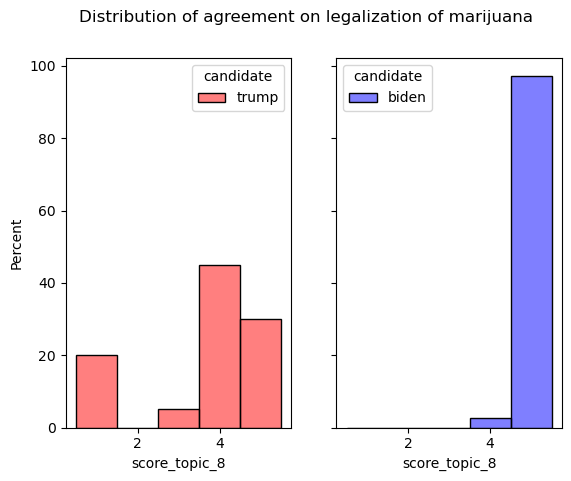

In [9]:
for i in range(len(topics)-1):
    question_No = i
    visualize(df, question_No, topics)